## Selecting the best threshold value using ROC curve

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_classification


In [3]:
make_classification

<function sklearn.datasets._samples_generator.make_classification(n_samples=100, n_features=20, *, n_informative=2, n_redundant=2, n_repeated=0, n_classes=2, n_clusters_per_class=2, weights=None, flip_y=0.01, class_sep=1.0, hypercube=True, shift=0.0, scale=1.0, shuffle=True, random_state=None)>

In [23]:
from sklearn.model_selection import train_test_split
X,y = make_classification(n_samples=2000, n_classes=2, weights=[1,1],random_state=42 )

## weight is basically how well balanced data you want
## [1,1] means equal proportion of data points

In [24]:
X.shape

(2000, 20)

In [26]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=1)


In [27]:
from sklearn.metrics import roc_curve, roc_auc_score

In [30]:
## when you are using the predict_proba one
## the first column is for 0 (prob. of its non occurence) and 2nd col is for prob 1

## RandomForest Classifier

In [29]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

y_train_pred = rf.predict_proba(X_train)
y_test_pred = rf.predict_proba(X_test)

print("Rf train roc-auc score: {}".format(roc_auc_score(y_train,y_train_pred[:,1])))
print("Rf test roc-auc score: {}".format(roc_auc_score(y_test,y_test_pred[:,1])))

Rf train roc-auc score: 1.0
Rf test roc-auc score: 0.9894732146839734


In [32]:
pd.DataFrame(y_train_pred)

,0,1
0,0.98,0.02
1,0.00,1.00
2,0.98,0.02
3,0.00,1.00
4,1.00,0.00
...,...,...
1395,1.00,0.00
1396,0.00,1.00
1397,1.00,0.00
1398,0.10,0.90


## Logistic Regression 

In [33]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(X_train,y_train)

y_train_pred = log.predict_proba(X_train)
y_test_pred = log.predict_proba(X_test)

print("Rf train roc-auc score: {}".format(roc_auc_score(y_train,y_train_pred[:,1])))
print("Rf test roc-auc score: {}".format(roc_auc_score(y_test,y_test_pred[:,1])))

Rf train roc-auc score: 0.9729739665345285
Rf test roc-auc score: 0.9765823631740935


In [34]:

from sklearn.metrics import accuracy_score
y_pred = log.predict(X_test)

accuracy_score(y_test,y_pred)


0.93

## Adaboost

In [35]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()
ada.fit(X_train,y_train)

y_train_pred = ada.predict_proba(X_train)
y_test_pred = ada.predict_proba(X_test)

print("Rf train roc-auc score: {}".format(roc_auc_score(y_train,y_train_pred[:,1])))
print("Rf test roc-auc score: {}".format(roc_auc_score(y_test,y_test_pred[:,1])))

Rf train roc-auc score: 0.9972540994487775
Rf test roc-auc score: 0.9826653731210134


In [36]:

from sklearn.metrics import accuracy_score
y_pred = ada.predict(X_test)

accuracy_score(y_test,y_pred)


0.965

## KNNClassifier

In [37]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

y_train_pred = knn.predict_proba(X_train)
y_test_pred = knn.predict_proba(X_test)

print("Rf train roc-auc score: {}".format(roc_auc_score(y_train,y_train_pred[:,1])))
print("Rf test roc-auc score: {}".format(roc_auc_score(y_test,y_test_pred[:,1])))


Rf train roc-auc score: 0.9863491266014349
Rf test roc-auc score: 0.9626823230295731


## Lets select best threshold for max accuracy


In [38]:
pred = []
for model in [rf,log,ada,knn]:
    pred.append(pd.Series(model.predict_proba(X_test)[:,1]))    


In [45]:
pd.concat(pred,axis=1)

,0,1,2,3
0,0.02,0.002022,0.303972,0.0
1,0.94,0.810422,0.518167,0.8
2,0.01,0.001143,0.333020,0.0
3,0.99,0.793119,0.532488,1.0
4,0.00,0.000029,0.335902,0.0
...,...,...,...,...
595,0.01,0.056588,0.466170,0.4
596,0.00,0.003621,0.346311,0.0
597,0.89,0.973747,0.517228,0.8
598,0.99,0.992011,0.539912,1.0


In [46]:
## pred

final_pred = pd.concat(pred,axis=1).mean(axis=1)

print('Ensemble ROC Score: {}'.format(roc_auc_score(y_test,final_pred)))

Ensemble ROC Score: 0.9885253579553057


In [48]:
fpr,tpr,threshold = roc_curve(y_test,final_pred)
threshold

array([1.92448083, 0.92448083, 0.83386521, 0.83360876, 0.81389976,
       0.81382276, 0.80059782, 0.80012895, 0.71214365, 0.70628975,
       0.70212686, 0.69474488, 0.68405607, 0.68230302, 0.67803491,
       0.6736991 , 0.65645187, 0.65623605, 0.61000552, 0.6042781 ,
       0.59114356, 0.58566552, 0.58115508, 0.57111374, 0.56575151,
       0.55170842, 0.54627466, 0.54610718, 0.53948653, 0.49539451,
       0.49225435, 0.49142958, 0.47237155, 0.4652108 , 0.45126988,
       0.38105953, 0.37233793, 0.26585168, 0.26446667, 0.18894311,
       0.18865396, 0.17695406, 0.17624358, 0.10412338, 0.10066234,
       0.05603418])

In [52]:
accuracy_ls = []
for thres in threshold:
    y_pred = np.where(final_pred > thres,1,0)
    accuracy_ls.append(accuracy_score(y_test,y_pred))

accurcay_ls = pd.concat([pd.Series(threshold),pd.Series(accuracy_ls)],axis=1)
accurcay_ls.columns = ['threshold','accuracy']
accurcay_ls.sort_values(by='accuracy',ascending=False,inplace=True)

accurcay_ls.head()


,threshold,accuracy
23,0.571114,0.956667
19,0.604278,0.955000
27,0.546107,0.955000
25,0.551708,0.955000
24,0.565752,0.955000


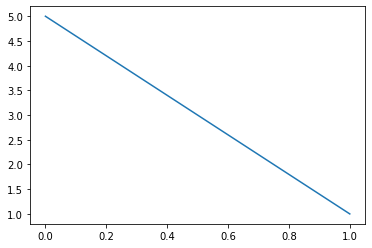

In [62]:
plt.plot([0,1],[5,1])

## just a sample of plot function

## 0,5 to 1,1

No handles with labels found to put in legend.


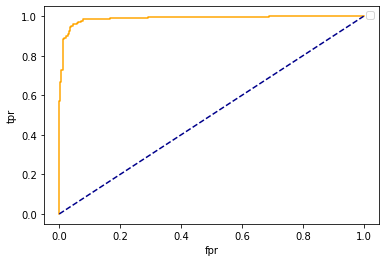

In [61]:
plt.plot(fpr,tpr,color='orange')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--')
## 0,0 to 1,1
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.legend()


## the given curve is covering the maximum area
## so pretty good curve